In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


# Load Data

In [2]:
data = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

# Explore Data

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Only BMI has missing values

In [4]:
data.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
categorical_features = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
numeric_features = ['age', 'avg_glucose_level','bmi']

## Categorical Variables

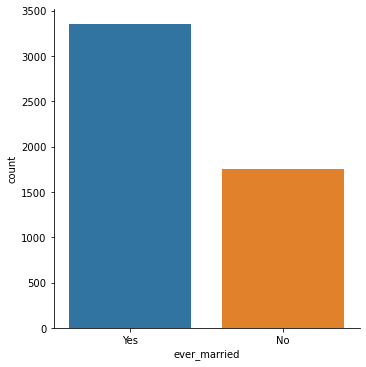

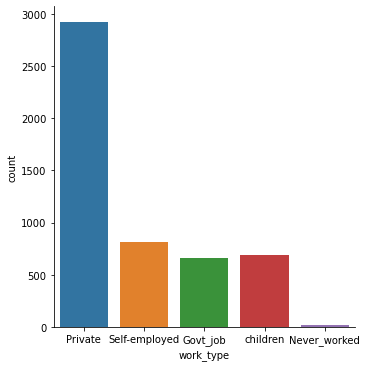

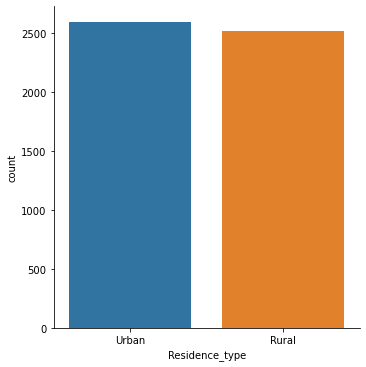

In [7]:
sns.catplot(x="ever_married", kind="count", data=data)
sns.catplot(x="work_type", kind="count", data=data)
sns.catplot(x="Residence_type", kind="count", data=data)

There is approximately 100 more Females than Males in the dataset

Text(0.5, 1.0, 'Distribution of Genders')

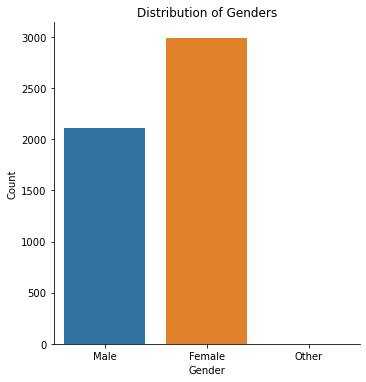

In [8]:
sns.catplot(x="gender", kind="count", data=data)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Genders")


Most individuals in the dataset do not have heart disease

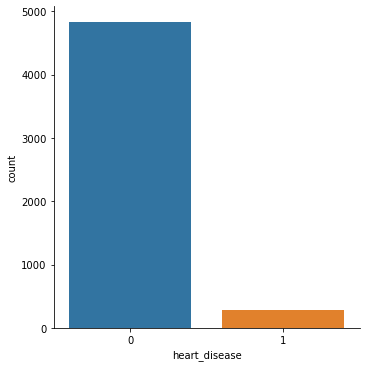

In [9]:
sns.catplot(x="heart_disease", kind="count", data=data)

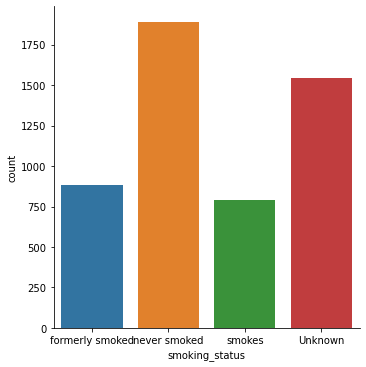

In [10]:
sns.catplot(x="smoking_status", kind="count", data=data)

Unknown Values are present in Somking Status.

### Age

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

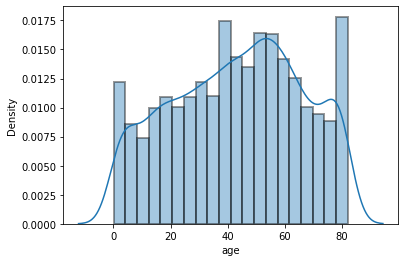

In [11]:
sns.distplot(data.age, hist_kws=dict(edgecolor="k", linewidth=2))

## Data Imputing

Only BMI and Smoking Status has missing values.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

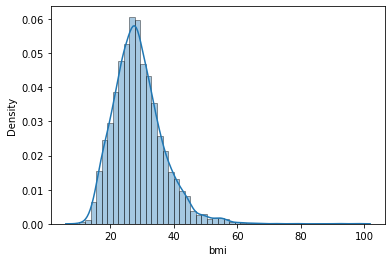

In [12]:
sns.distplot(data.bmi, hist_kws=dict(edgecolor="k", linewidth=1))

In [13]:
# Replace Missing values of BMI with the mean BMI
data.bmi = data.bmi.fillna(np.mean(data.bmi))

In [14]:
data.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [15]:
# Replace Unknowns with for smoking status with most frequent status.
data.smoking_status = data.smoking_status.replace("Unknown", "never smoked")

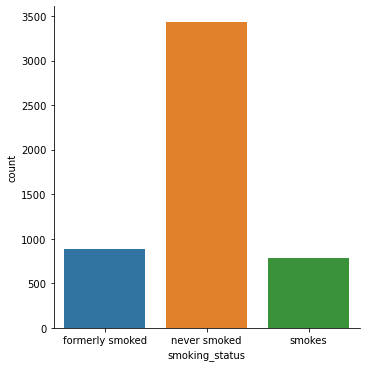

In [16]:
sns.catplot(x="smoking_status", kind="count", data=data)

In [17]:
x = data.drop(["id","stroke"], axis=1)
y = data.stroke

## Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 940)

In [20]:
sum(y_train)/len(y_train)

0.048084987419625386

In [21]:
oversample = RandomOverSampler(sampling_strategy=0.5)
undersample = RandomUnderSampler(sampling_strategy=0.9)
x_train, y_train = oversample.fit_resample(x_train, y_train)
x_train, y_train = undersample.fit_resample(x_train, y_train)

In [22]:
sum(y_train)/len(y_train)

0.4736988588922906

# Model Training

Multiple models will be trained for Stroke Prediction.

Evaluation Metrics are Recall and Accuracy.
Since it is essential to ensure that False Negatives are minimised, recall should be used as an evaluation metric.

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [24]:
def create_pipeline(model):
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    numeric_transformer = StandardScaler()
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    return clf

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
def confusion_matrix_scorer(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    return {'tn': cm[0, 0], 'fp': cm[0, 1],
             'fn': cm[1, 0], 'tp': cm[1, 1]}

In [26]:
def evaluate_results(y_test, y_pred):
    cm = confusion_matrix_scorer(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    print(f"Number of True Positives: {cm['tp']}\nNumber of False Positives: {cm['fp']}\nNumber of True Negatives: {cm['tn']}\
    \nNumber of False Negatives: {cm['fn']}")
    print("Accuracy Score: %0.4f" % acc)
    print("Balanced Accuracy Score: %0.4f" % bal_acc)
    print("Recall Score: %0.4f" % rec)
    return{"bal_acc":bal_acc, "acc":acc, "recall":rec}

In [27]:
def evaluate(model):
    print("Model Evaluation on Train Set")
    y_t_pred = model.predict(x_train)
    evaluate_results(y_train, y_t_pred)
    plot_confusion_matrix(model, x_train, y_train, normalize="true")
    plt.title("Confusion Matrix for Train Set")
    print("-----------------------------------")
    print("Model Evaluation on Test Set")
    y_pred = model.predict(x_test)
    scores = evaluate_results(y_test, y_pred)
    plot_confusion_matrix(model, x_test, y_test, normalize="true")
    plt.title("Confusion Matrix for Test Set")
    return scores

In [80]:
def SearchParams(model, params, score = "recall", verbose=3):
    '''Takes in model, params (dict of parameters for grid serach), score - the scoring method
    and returns the gridsearchobject'''
    pipe = create_pipeline(model)
    search = GridSearchCV(pipe, params, n_jobs=-1, scoring=score, verbose=verbose)
    search.fit(x_train,y_train)
    print("The best mean %s score is %.4f" % (score, search.best_score_))
    print("The best parameters are:", search.best_params_)
    scores = evaluate(search.best_estimator_)
    return (search, scores)

## Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [82]:
clf = create_pipeline(GaussianNB())

In [83]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def confusion_matrix_scorer(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    return {'tn': cm[0, 0], 'fp': cm[0, 1],
             'fn': cm[1, 0], 'tp': cm[1, 1]}

Model Evaluation on Train Set
Number of True Positives: 1696
Number of False Positives: 1467
Number of True Negatives: 424    
Number of False Negatives: 6
Accuracy Score: 0.5900
Balanced Accuracy Score: 0.6103
Recall Score: 0.9965
-----------------------------------
Model Evaluation on Test Set
Number of True Positives: 76
Number of False Positives: 1133
Number of True Negatives: 323    
Number of False Negatives: 1
Accuracy Score: 0.2603
Balanced Accuracy Score: 0.6044
Recall Score: 0.9870


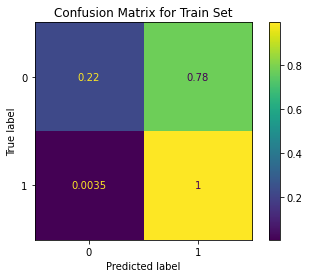

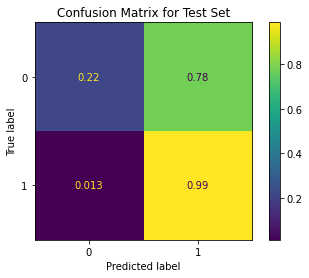

In [96]:
scores_NB = evaluate(clf)

## Support Vector Machines

In [86]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

Fitting 5 folds for each of 9 candidates, totalling 45 fits
The best mean recall score is 0.8079
The best parameters are: {'classifier__alpha': 0.001, 'classifier__tol': 0.0001}
Model Evaluation on Train Set
Number of True Positives: 1318
Number of False Positives: 441
Number of True Negatives: 1450    
Number of False Negatives: 384
Accuracy Score: 0.7704
Balanced Accuracy Score: 0.7706
Recall Score: 0.7744
-----------------------------------
Model Evaluation on Test Set
Number of True Positives: 61
Number of False Positives: 355
Number of True Negatives: 1101    
Number of False Negatives: 16
Accuracy Score: 0.7580
Balanced Accuracy Score: 0.7742
Recall Score: 0.7922


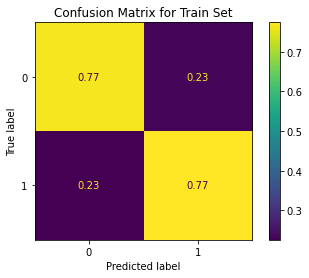

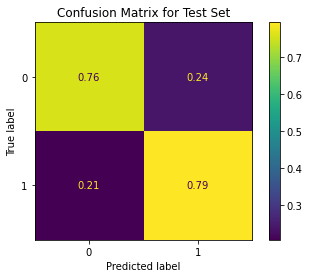

In [87]:
parameters = {'classifier__alpha':(0.0001, 0.001, 0.01), 'classifier__tol':(0.001, 0.0001, 0.00001)}
search_svm, scores_svm = SearchParams(SGDClassifier(random_state=41), parameters)

## Logisitc Regression

Fitting 5 folds for each of 9 candidates, totalling 45 fits
The best mean recall score is 0.7909
The best parameters are: {'classifier__alpha': 0.01, 'classifier__tol': 0.001}
Model Evaluation on Train Set
Number of True Positives: 1375
Number of False Positives: 494
Number of True Negatives: 1397    
Number of False Negatives: 327
Accuracy Score: 0.7715
Balanced Accuracy Score: 0.7733
Recall Score: 0.8079
-----------------------------------
Model Evaluation on Test Set
Number of True Positives: 63
Number of False Positives: 394
Number of True Negatives: 1062    
Number of False Negatives: 14
Accuracy Score: 0.7339
Balanced Accuracy Score: 0.7738
Recall Score: 0.8182


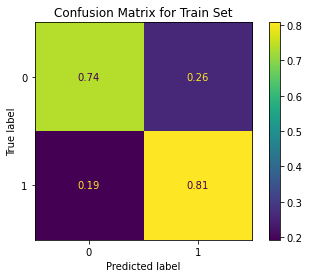

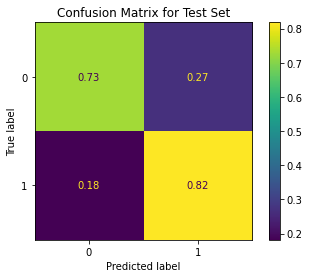

In [88]:
search_LR, scores_LR = SearchParams(SGDClassifier(loss='log',random_state=401),
                     {'classifier__alpha':(0.0001, 0.001, 0.01), 'classifier__tol':(0.001, 0.0001, 0.00001)})

## K Nearest Neighbours

In [89]:
from sklearn.neighbors import KNeighborsClassifier

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best mean recall score is 0.9982
The best parameters are: {'classifier__n_neighbors': 3}
Model Evaluation on Train Set
Number of True Positives: 1702
Number of False Positives: 149
Number of True Negatives: 1742    
Number of False Negatives: 0
Accuracy Score: 0.9585
Balanced Accuracy Score: 0.9606
Recall Score: 1.0000
-----------------------------------
Model Evaluation on Test Set
Number of True Positives: 24
Number of False Positives: 203
Number of True Negatives: 1253    
Number of False Negatives: 53
Accuracy Score: 0.8330
Balanced Accuracy Score: 0.5861
Recall Score: 0.3117


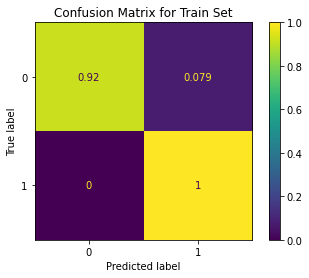

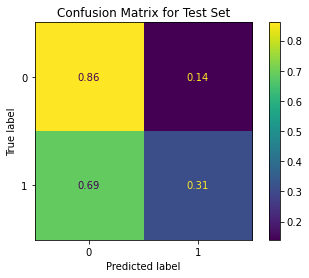

In [90]:
search_knn, scores_knn = SearchParams(KNeighborsClassifier(), {'classifier__n_neighbors':tuple(range(3,22,2))})

## Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

Fitting 5 folds for each of 44 candidates, totalling 220 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1.
 nan  1. nan  1. nan  1. nan  1.]
  category=UserWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


The best mean recall score is 1.0000
The best parameters are: {'classifier__bootstrap': True, 'classifier__n_estimators': 100, 'classifier__oob_score': True}
Model Evaluation on Train Set
Number of True Positives: 1702
Number of False Positives: 0
Number of True Negatives: 1891    
Number of False Negatives: 0
Accuracy Score: 1.0000
Balanced Accuracy Score: 1.0000
Recall Score: 1.0000


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


-----------------------------------
Model Evaluation on Test Set
Number of True Positives: 10
Number of False Positives: 43
Number of True Negatives: 1413    
Number of False Negatives: 67
Accuracy Score: 0.9282
Balanced Accuracy Score: 0.5502
Recall Score: 0.1299


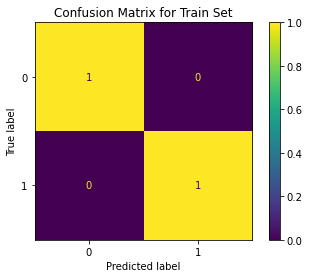

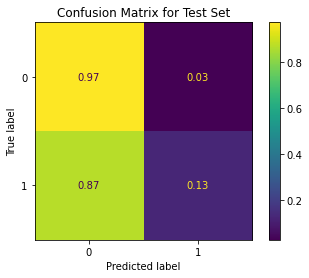

In [92]:
params = {"classifier__n_estimators":tuple(range(100,2200,200)), "classifier__bootstrap":(True, False),
         "classifier__oob_score":(True, False)}
search_RF, scores_RF = SearchParams(RandomForestClassifier(random_state=421, verbose=1), params)

# Summary of Models

In [99]:
models = ['knn', 'NB', 'svm', 'LR', 'RF']
final_models = []
globals()['scores_knn']
for model in models:
    print(model +':', globals()['scores_'+model])
    if model != "NB":
        final_models.append(globals()['search_'+model])

knn: {'bal_acc': 0.5861326173826173, 'acc': 0.8330071754729289, 'recall': 0.3116883116883117}
NB: {'bal_acc': 0.6044268231768232, 'acc': 0.2602739726027397, 'recall': 0.987012987012987}
svm: {'bal_acc': 0.7741945554445555, 'acc': 0.7579908675799086, 'recall': 0.7922077922077922}
LR: {'bal_acc': 0.7737887112887113, 'acc': 0.7338551859099804, 'recall': 0.8181818181818182}
RF: {'bal_acc': 0.5501685814185814, 'acc': 0.9282452707110241, 'recall': 0.12987012987012986}


Although Naive Bayes have the highest recall, it has a ver low accuracy. Hence, Logistic Regression seems to be the best model to predict Stroke.